## Steepest descent
**Babak Poursartip**

In [1]:
import sys
sys.executable

'/home/babak/anaconda3/bin/python'

Importing the required libraries

In [2]:
import numpy as np
import numpy.linalg as la # linear algebra

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline

Defining the function and its gradient

In [3]:
# x, the indep. variable of the func., is an array of size n
def f(x):
  #return 0.5*x[0]**2 + 2.5*x[1]**2
  return np.sin(0.5*x[0]**2-0.5*x[1]**2+3)*np.cos(2*x[0] + 1 -np.exp(x[1]))

def df(x):
  # put the derivative with respect to each component in the array
  d1 = x[0]*np.cos(2*x[0] - np.exp(x[1]) +1)*np.cos(0.5*x[0]**2-0.25*x[1]**2 +3)-2*np.sin( 2*x[0]-np.exp(x[1]+1))*np.sin( 0.5*x[0]**2 -0.25*x[1]**2 +3 )
  d2 = np.exp(x[1]) * np.sin( 2*x[0]-np.exp(x[1])+1) * np.sin( 0.5*x[0]**2 -0.25*x[1]**2 +3)  - 0.5*x[1]* np.cos(2*x[0] - np.exp(x[1]) +1)*np.cos( 0.5*x[0]**2 -0.25*x[1]**2 +3)
  return np.array([d1 , d2])
  #return np.array([x[0], 5*x[1]])

Let's plot the function here:

In [4]:
def plot_func(guesses):
  # 3d plot of the function
  Title      = "function"
  fig = plt.figure()
  ax = fig.gca(projection="3d")
  xmesh, ymesh = np.mgrid[-1:3:50j,-1:3:50j]

  fmesh = f(np.array([xmesh, ymesh]))
  surf =ax.plot_surface(xmesh, ymesh, fmesh, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  plt.title(Title, fontsize = 16)
  plt.xlabel("x_1",     fontsize=12)
  plt.ylabel("x_2",     fontsize=12)
  #plt.zlabel("f(x)",     fontsize=12)
  fig.colorbar(surf, shrink=0.5, aspect=5)


  # contour plot of the function
  fig,ax = plt.subplots()  
  plt.axis('equal')
  plt.contour(xmesh, ymesh, fmesh,20)
  plt.colorbar();
  plt.xlabel("x_1",     fontsize=12)
  plt.ylabel("x_2",     fontsize=12)
  it_array = np.array(guesses)
  plt.plot(it_array.T[0], it_array.T[1], "x-")

Steepest descent

In [5]:
def steepest_descent(tol, max_iters):
  print("{}".format(" steepest descent starts ..."))
  # initial guess
  #x1 = np.zeros(2)
  x1 = [0.0,0.5]
  x0 = x1
  guesses = [x1]
  iters = 0 #iteration counter
  step_size = 0.0001
  
  while ((step_size > tol) and (iters < max_iters)):
    s0 = -df(x0)
    s1 = -df(x1)  
    if iters != 0:
      rate = abs( np.dot( ((x1-x0).transpose()),(s1-s0)))/( pow((la.norm(s1-s0)),2) )
    else:
      rate = 0.00001

    x0 = x1 #Store current x value in prev_x    
    x1 = x1 - rate * df(x0) #Grad descent
    step_size = abs(la.norm(x1 - x0)) #Change in x
    iters = iters+1 #iteration count
    guesses.append(x1)

    print("{:} {:5d} {:} {:} {:} {:10.3e} {:} {:6.3f}".format("Iteration:",iters," \n sol:",x1, "step size:", step_size, "rate: ", rate))
    
  print("The local minimum occurs at", x0)
  return guesses

The main function

 Steepest descent code starts ...
 steepest descent starts ...
Iteration:     1  
 sol: [3.94618157e-06 5.00000068e-01] step size:  3.947e-06 rate:   0.000
Iteration:     2  
 sol: [0.22680172 0.50391185] step size:  2.268e-01 rate:   0.575
Iteration:     3  
 sol: [0.46915531 0.41466094] step size:  2.583e-01 rate:   0.486
Iteration:     4  
 sol: [1.18023552 0.0277512 ] step size:  8.095e-01 rate:   1.648
Iteration:     5  
 sol: [0.97048089 0.36468213] step size:  3.969e-01 rate:   0.842
Iteration:     6  
 sol: [1.11688837 0.46370821] step size:  1.768e-01 rate:   0.243
Iteration:     7  
 sol: [1.40978474 0.76842912] step size:  4.227e-01 rate:   0.452
Iteration:     8  
 sol: [1.41122445 0.83738233] step size:  6.897e-02 rate:   0.049
Iteration:     9  
 sol: [1.41051627 0.84048748] step size:  3.185e-03 rate:   0.002
Iteration:    10  
 sol: [1.40997255 0.8427666 ] step size:  2.343e-03 rate:   0.002
Iteration:    11  
 sol: [1.4084412  0.84898688] step size:  6.406e-03 rate:   

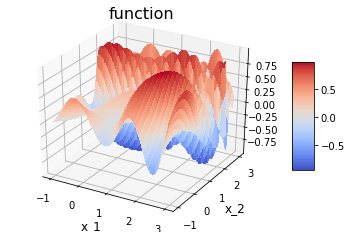

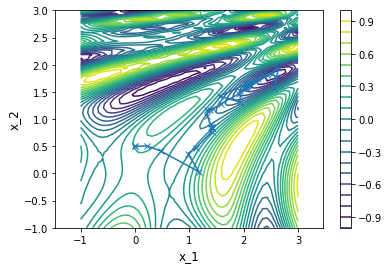

In [6]:

def main():
    print(" Steepest descent code starts ...")
 
    tol = 0.000001 #This tells us when to stop the algorithm
    max_iters = 10000 # maximum number of iterations
    guesses = steepest_descent(tol, max_iters)

    plot_func(guesses)
    
    print(" Steepest descent terminates successfully!")

if __name__ =="__main__":
    main()